# COLLABORATIVE FILTERING - BOOK RECOMMENDATION SYSTEM

**Models:**  SVD + NMF  
**Author:** Your Name  
**Date:** 2025

---

## 📚 BƯỚC 1: IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Surprise library cho Collaborative Filtering
from surprise import Dataset, Reader, accuracy
from surprise import SVD, NMF
from surprise.model_selection import train_test_split
import pickle
import os

print("✅ Import libraries thành công!")

✅ Import libraries thành công!


## 📂 BƯỚC 2: LOAD DATA

In [9]:
print("="*70)
print("BƯỚC 2: LOAD DATA")
print("="*70)

books = pd.read_csv('D:/Ky7/NMKHDL/Final_Project/dataset/cleaned/Books_cleaned.csv')
users = pd.read_csv('D:/Ky7/NMKHDL/Final_Project/dataset/cleaned/Users_cleaned.csv')
ratings = pd.read_csv('D:/Ky7/NMKHDL/Final_Project/dataset/cleaned/Ratings_cleaned.csv')

print(f"\n📚 Books shape: {books.shape}")
print(f"👤 Users shape: {users.shape}")
print(f"⭐ Ratings shape: {ratings.shape}")


BƯỚC 2: LOAD DATA

📚 Books shape: (266730, 8)
👤 Users shape: (277898, 3)
⭐ Ratings shape: (1149780, 3)


## 📊 BƯỚC 3: PHÂN TÍCH RATINGS

In [10]:
print("="*70)
print("BƯỚC 3: PHÂN TÍCH RATINGS")
print("="*70)

print("\n📊 Phân bố ratings:")
print(ratings['Book-Rating'].value_counts().sort_index())

print(f"\n📈 Statistics:")
print(f"   - Min rating: {ratings['Book-Rating'].min()}")
print(f"   - Max rating: {ratings['Book-Rating'].max()}")
print(f"   - Mean rating: {ratings['Book-Rating'].mean():.2f}")
print(f"   - Median rating: {ratings['Book-Rating'].median():.2f}")

# Số lượng rating = 0
implicit_count = (ratings['Book-Rating'] == 0).sum()
explicit_count = (ratings['Book-Rating'] > 0).sum()

print(f"\n🎯 Loại ratings:")
print(f"   - Implicit (rating = 0): {implicit_count:,} ({implicit_count/len(ratings)*100:.1f}%)")
print(f"   - Explicit (rating 1-10): {explicit_count:,} ({explicit_count/len(ratings)*100:.1f}%)")

BƯỚC 3: PHÂN TÍCH RATINGS

📊 Phân bố ratings:
Book-Rating
0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64

📈 Statistics:
   - Min rating: 0
   - Max rating: 10
   - Mean rating: 2.87
   - Median rating: 0.00

🎯 Loại ratings:
   - Implicit (rating = 0): 716,109 (62.3%)
   - Explicit (rating 1-10): 433,671 (37.7%)


## ✂️ BƯỚC 4: FILTER CHỈ LẤY EXPLICIT RATINGS

In [12]:
print("="*70)
print("BƯỚC 4: FILTER EXPLICIT RATINGS")
print("="*70)

# Chỉ lấy ratings từ 1-10 (bỏ rating = 0)
ratings_explicit = ratings[ratings['Book-Rating'] > 0].copy()

print(f"\n✂️ Ratings sau khi filter:")
print(f"   - Trước: {len(ratings):,}")
print(f"   - Sau: {len(ratings_explicit):,}")
print(f"   - Bỏ đi: {len(ratings) - len(ratings_explicit):,}")

# Thống kê sau filter
print(f"\n📊 Statistics sau filter:")
print(f"   - Unique users: {ratings_explicit['User-ID'].nunique():,}")
print(f"   - Unique books: {ratings_explicit['ISBN'].nunique():,}")
print(f"   - Total ratings: {len(ratings_explicit):,}")
print(f"   - Mean rating: {ratings_explicit['Book-Rating'].mean():.2f}")

# Sparsity
n_users = ratings_explicit['User-ID'].nunique()
n_books = ratings_explicit['ISBN'].nunique()
sparsity = 1 - (len(ratings_explicit) / (n_users * n_books))
print(f"   - Sparsity: {sparsity*100:.2f}%")

BƯỚC 4: FILTER EXPLICIT RATINGS

✂️ Ratings sau khi filter:
   - Trước: 1,149,780
   - Sau: 433,671
   - Bỏ đi: 716,109

📊 Statistics sau filter:
   - Unique users: 77,805
   - Unique books: 185,973
   - Total ratings: 433,671
   - Mean rating: 7.60
   - Sparsity: 100.00%


## 🔧 BƯỚC 5: CHUẨN BỊ DATA CHO SURPRISE

In [15]:
print("="*70)
print("BƯỚC 5: CHUẨN BỊ DATA CHO SURPRISE")
print("="*70)

# Define Reader với rating scale 1-10
reader = Reader(rating_scale=(1, 10))

# Load data vào Surprise Dataset
data = Dataset.load_from_df(
    ratings_explicit[['User-ID', 'ISBN', 'Book-Rating']], 
    reader
)

print("✅ Data đã được chuẩn bị cho Surprise!")

# Train-test split (80% train, 20% test)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

print(f"\n📦 Train-test split:")
print(f"   - Training set: {trainset.n_ratings:,} ratings")
print(f"   - Test set: {len(testset):,} ratings")

BƯỚC 5: CHUẨN BỊ DATA CHO SURPRISE
✅ Data đã được chuẩn bị cho Surprise!

📦 Train-test split:
   - Training set: 346,936 ratings
   - Test set: 86,735 ratings


## 🧠 BƯỚC 6: MODEL 2 - SVD (MATRIX FACTORIZATION)

In [16]:
print("="*70)
print("BƯỚC 6: TRAINING SVD")
print("="*70)

print("\n🔧 Configuring SVD...")
algo_svd = SVD(
    n_factors=100,         # Số latent factors
    n_epochs=20,           # Số epochs
    lr_all=0.005,          # Learning rate
    reg_all=0.02,          # Regularization
    random_state=42,
    verbose=True
)

print("\n⏳ Training SVD... (có thể mất 1-3 phút)")
algo_svd.fit(trainset)
print("✅ SVD training hoàn thành!")

BƯỚC 6: TRAINING SVD

🔧 Configuring SVD...

⏳ Training SVD... (có thể mất 1-3 phút)
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
✅ SVD training hoàn thành!


In [17]:
# Predict trên test set
print("\n🔮 Predicting on test set...")
predictions_svd = algo_svd.test(testset)

# Evaluation
print("\n📊 SVD EVALUATION:")
rmse_svd = accuracy.rmse(predictions_svd, verbose=True)
mae_svd = accuracy.mae(predictions_svd, verbose=True)


🔮 Predicting on test set...

📊 SVD EVALUATION:
RMSE: 1.6399
MAE:  1.2662


## 🔬 BƯỚC 7: MODEL 3 - NMF (OPTIONAL)

In [18]:
print("="*70)
print("BƯỚC 7: TRAINING NMF (OPTIONAL)")
print("="*70)

print("\n🔧 Configuring NMF...")
algo_nmf = NMF(
    n_factors=50,          # Số latent factors
    n_epochs=50,           # Số epochs (NMF cần nhiều hơn)
    random_state=42,
    verbose=True
)

print("\n⏳ Training NMF... (có thể mất 2-4 phút)")
algo_nmf.fit(trainset)
print("✅ NMF training hoàn thành!")

BƯỚC 7: TRAINING NMF (OPTIONAL)

🔧 Configuring NMF...

⏳ Training NMF... (có thể mất 2-4 phút)
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoc

In [19]:
# Predict trên test set
print("\n🔮 Predicting on test set...")
predictions_nmf = algo_nmf.test(testset)

# Evaluation
print("\n📊 NMF EVALUATION:")
rmse_nmf = accuracy.rmse(predictions_nmf, verbose=True)
mae_nmf = accuracy.mae(predictions_nmf, verbose=True)


🔮 Predicting on test set...

📊 NMF EVALUATION:
RMSE: 1.9722
MAE:  1.5262


## 📊 BƯỚC 8: SO SÁNH CÁC MODELS

In [20]:
print("="*70)
print("BƯỚC 8: SO SÁNH MODELS")
print("="*70)

# Tạo DataFrame so sánh
comparison = pd.DataFrame({
    'Model': ['SVD', 'NMF'],
    'RMSE': [ rmse_svd, rmse_nmf],
    'MAE': [ mae_svd, mae_nmf]
})

print("\n📊 BẢNG SO SÁNH:")
print(comparison.to_string(index=False))

# Best model
best_model_rmse = comparison.loc[comparison['RMSE'].idxmin(), 'Model']
print(f"\n🏆 BEST MODEL (theo RMSE): {best_model_rmse}")

BƯỚC 8: SO SÁNH MODELS

📊 BẢNG SO SÁNH:
Model     RMSE      MAE
  SVD 1.639868 1.266201
  NMF 1.972233 1.526245

🏆 BEST MODEL (theo RMSE): SVD


NameError: name 'comparison' is not defined

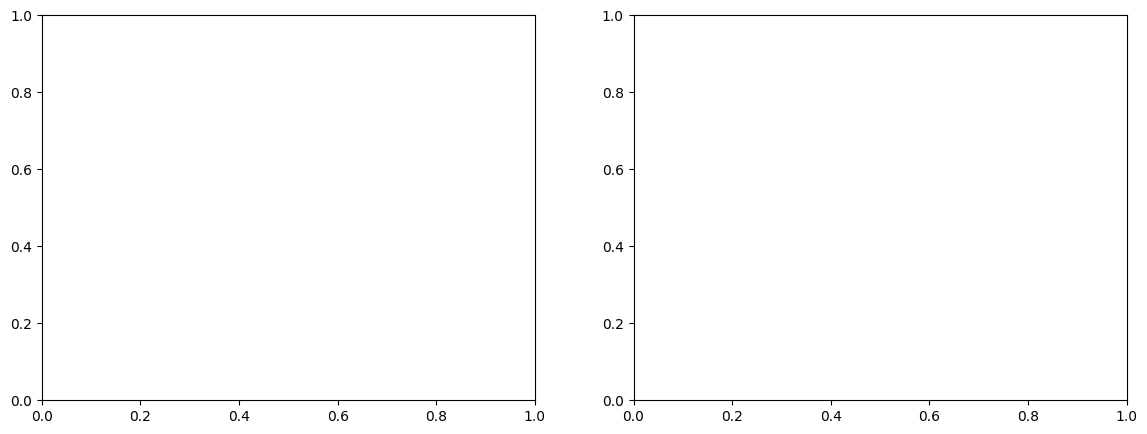

In [3]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE comparison
axes[0].bar(comparison['Model'], comparison['RMSE'], 
            color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0].set_title('RMSE Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('RMSE (Lower is Better)')
axes[0].set_ylim([0, max(comparison['RMSE']) * 1.2])
for i, v in enumerate(comparison['RMSE']):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# MAE comparison
axes[1].bar(comparison['Model'], comparison['MAE'], 
            color=['#3498db', '#e74c3c', '#2ecc71'])
axes[1].set_title('MAE Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('MAE (Lower is Better)')
axes[1].set_ylim([0, max(comparison['MAE']) * 1.2])
for i, v in enumerate(comparison['MAE']):
    axes[1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Đã lưu biểu đồ: models_comparison.png")

## 🎯 BƯỚC 9: PRECISION@K & RECALL@K

In [22]:
print("="*70)
print("BƯỚC 9: PRECISION@K & RECALL@K")
print("="*70)

def precision_recall_at_k(predictions, k=10, threshold=7):
    """
    Tính Precision và Recall tại K
    
    Parameters:
    - predictions: list predictions từ surprise
    - k: số top recommendations
    - threshold: rating >= threshold được coi là relevant
    
    Returns:
    - precision, recall
    """
    
    # Tạo dict: user -> [(item, rating_true, rating_pred)]
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((iid, true_r, est))
    
    precisions = []
    recalls = []
    
    for uid, user_ratings in user_est_true.items():
        # Sort theo predicted rating (giảm dần)
        user_ratings.sort(key=lambda x: x[2], reverse=True)
        
        # Top K recommendations
        top_k = user_ratings[:k]
        
        # Số items relevant trong top K
        n_rel_and_rec_k = sum((true_r >= threshold) for (_, true_r, _) in top_k)
        
        # Tổng số items relevant của user
        n_rel = sum((true_r >= threshold) for (_, true_r, _) in user_ratings)
        
        # Precision@K
        precisions.append(n_rel_and_rec_k / k if k != 0 else 0)
        
        # Recall@K
        recalls.append(n_rel_and_rec_k / n_rel if n_rel != 0 else 0)
    
    return np.mean(precisions), np.mean(recalls)

print("✅ Function precision_recall_at_k đã được định nghĩa!")

BƯỚC 9: PRECISION@K & RECALL@K
✅ Function precision_recall_at_k đã được định nghĩa!


In [24]:
# Tính cho từng model
print("\n⏳ Calculating Precision@K & Recall@K...")

k_values = [5, 10, 20]
results = []

for k in k_values:
    print(f"\nCalculating for K={k}...")
    
    
    
    # SVD
    prec_svd, rec_svd = precision_recall_at_k(predictions_svd, k=k, threshold=7)
    
    # NMF
    prec_nmf, rec_nmf = precision_recall_at_k(predictions_nmf, k=k, threshold=7)
    
    results.append({
        'K': k,
        
        'SVD_Precision': prec_svd,
        'SVD_Recall': rec_svd,
        'NMF_Precision': prec_nmf,
        'NMF_Recall': rec_nmf
    })

results_df = pd.DataFrame(results)

print("\n📊 PRECISION & RECALL AT K:")
print(results_df.to_string(index=False))


⏳ Calculating Precision@K & Recall@K...

Calculating for K=5...

Calculating for K=10...

Calculating for K=20...

📊 PRECISION & RECALL AT K:
 K  SVD_Precision  SVD_Recall  NMF_Precision  NMF_Recall
 5       0.274938    0.757808       0.275136    0.757986
10       0.164338    0.785068       0.164441    0.785150
20       0.093443    0.797683       0.093523    0.797752


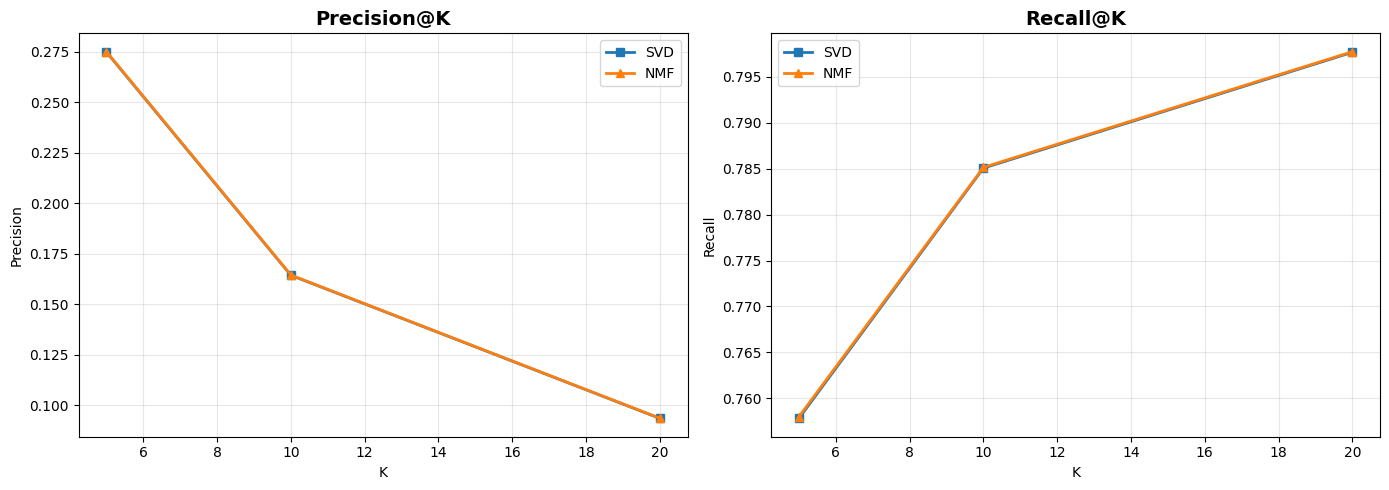


💾 Đã lưu biểu đồ: precision_recall_at_k.png


In [26]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Precision@K
axes[0].plot(k_values, results_df['SVD_Precision'], marker='s', label='SVD', linewidth=2)
axes[0].plot(k_values, results_df['NMF_Precision'], marker='^', label='NMF', linewidth=2)
axes[0].set_title('Precision@K', fontsize=14, fontweight='bold')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Precision')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Recall@K
axes[1].plot(k_values, results_df['SVD_Recall'], marker='s', label='SVD', linewidth=2)
axes[1].plot(k_values, results_df['NMF_Recall'], marker='^', label='NMF', linewidth=2)
axes[1].set_title('Recall@K', fontsize=14, fontweight='bold')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Recall')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('precision_recall_at_k.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Đã lưu biểu đồ: precision_recall_at_k.png")

## 💾 BƯỚC 10: SAVE MODELS

In [27]:
print("="*70)
print("BƯỚC 10: SAVE MODELS")
print("="*70)

# Tạo thư mục nếu chưa có
os.makedirs('saved_models', exist_ok=True)

# Save models


with open('saved_models/svd_model.pkl', 'wb') as f:
    pickle.dump(algo_svd, f)
print("✅ Saved: svd_model.pkl")

with open('saved_models/nmf_model.pkl', 'wb') as f:
    pickle.dump(algo_nmf, f)
print("✅ Saved: nmf_model.pkl")

# Save comparison results
comparison.to_csv('saved_models/models_comparison.csv', index=False)
results_df.to_csv('saved_models/precision_recall_at_k.csv', index=False)
print("✅ Saved: models_comparison.csv")
print("✅ Saved: precision_recall_at_k.csv")

print("\n🎉 Tất cả models và results đã được lưu!")

BƯỚC 10: SAVE MODELS
✅ Saved: svd_model.pkl
✅ Saved: nmf_model.pkl
✅ Saved: models_comparison.csv
✅ Saved: precision_recall_at_k.csv

🎉 Tất cả models và results đã được lưu!


## 🧪 BƯỚC 11: TEST RECOMMENDATION FUNCTIONS

In [28]:
print("="*70)
print("BƯỚC 11: TEST RECOMMENDATION FUNCTIONS")
print("="*70)

def get_top_n_recommendations(algo, user_id, n=10):
    """
    Gợi ý Top N sách cho user
    
    Parameters:
    - algo: trained model
    - user_id: ID của user
    - n: số lượng recommendations
    
    Returns:
    - List of (book_isbn, predicted_rating)
    """
    
    # Lấy tất cả books
    all_books = ratings_explicit['ISBN'].unique()
    
    # Lấy books mà user đã rate
    user_books = ratings_explicit[ratings_explicit['User-ID'] == user_id]['ISBN'].values
    
    # Books chưa rate
    books_to_predict = [book for book in all_books if book not in user_books]
    
    # Predict ratings
    predictions = [algo.predict(user_id, book) for book in books_to_predict]
    
    # Sort theo predicted rating
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Top N
    top_n = [(pred.iid, pred.est) for pred in predictions[:n]]
    
    return top_n

print("✅ Function get_top_n_recommendations đã được định nghĩa!")


BƯỚC 11: TEST RECOMMENDATION FUNCTIONS
✅ Function get_top_n_recommendations đã được định nghĩa!


In [29]:
# Test với 1 user bất kỳ
test_user_id = ratings_explicit['User-ID'].iloc[100]

print(f"\n🧪 Testing recommendations cho User ID: {test_user_id}")
print("="*70)

# Xem books mà user đã rate
user_rated = ratings_explicit[ratings_explicit['User-ID'] == test_user_id]
print(f"\n📚 User đã rate {len(user_rated)} books")
print(f"   - Mean rating: {user_rated['Book-Rating'].mean():.2f}")
print(f"   - Min rating: {user_rated['Book-Rating'].min()}")
print(f"   - Max rating: {user_rated['Book-Rating'].max()}")


🧪 Testing recommendations cho User ID: 276847

📚 User đã rate 36 books
   - Mean rating: 8.42
   - Min rating: 5
   - Max rating: 10


In [30]:
# Get recommendations từ các models
print("\n⏳ Generating recommendations...\n")



# SVD recommendations
print("\n📗 TOP 10 RECOMMENDATIONS - SVD:")
svd_recs = get_top_n_recommendations(algo_svd, test_user_id, n=10)
for i, (isbn, rating) in enumerate(svd_recs, 1):
    book_title = books[books['ISBN'] == isbn]['Book-Title'].values
    if len(book_title) > 0:
        print(f"  {i}. {book_title[0][:50]}... (Predicted: {rating:.2f})")

# NMF recommendations
print("\n📙 TOP 10 RECOMMENDATIONS - NMF:")
nmf_recs = get_top_n_recommendations(algo_nmf, test_user_id, n=10)
for i, (isbn, rating) in enumerate(nmf_recs, 1):
    book_title = books[books['ISBN'] == isbn]['Book-Title'].values
    if len(book_title) > 0:
        print(f"  {i}. {book_title[0][:50]}... (Predicted: {rating:.2f})")


⏳ Generating recommendations...


📗 TOP 10 RECOMMENDATIONS - SVD:
  1. The Two Towers (The Lord of the Rings, Part 2)... (Predicted: 9.92)
  2. 52 Deck Series: 52 Ways to Celebrate Friendship... (Predicted: 9.89)
  3. Dilbert: A Book of Postcards... (Predicted: 9.89)
  5. The Lovely Bones: A Novel... (Predicted: 9.84)
  6. The Return of the King (The Lord of the Rings, Par... (Predicted: 9.80)
  7. Harry Potter and the Chamber of Secrets Postcard B... (Predicted: 9.75)
  8. Harry Potter and the Goblet of Fire (Book 4)... (Predicted: 9.74)
  9. Calvin and Hobbes... (Predicted: 9.71)
  10. Gone with the Wind... (Predicted: 9.71)

📙 TOP 10 RECOMMENDATIONS - NMF:
  1. A Painted House... (Predicted: 10.00)
  2. The Pillars of the Earth... (Predicted: 10.00)
  4. See Jane Run... (Predicted: 10.00)
  5. Blackwood Farm (Rice, Anne, Vampire Chronicles.)... (Predicted: 10.00)
  6. Harry Potter and the Order of the Phoenix (Book 5)... (Predicted: 10.00)
  7. False Memory... (Predicted: 10.00)
  

## 📊 BƯỚC 12: PHÂN TÍCH SỰ ĐỒNG THUẬN GIỮA CÁC MODELS

In [31]:
print("="*70)
print("BƯỚC 12: PHÂN TÍCH SỰ ĐỒNG THUẬN")
print("="*70)

# Lấy ISBN từ top 10 của mỗi model
svd_top_isbns = set([isbn for isbn, _ in svd_recs])
nmf_top_isbns = set([isbn for isbn, _ in nmf_recs])

# Tính overlap

svd_nmf_overlap = len(svd_top_isbns & nmf_top_isbns)
all_overlap = len( svd_top_isbns & nmf_top_isbns)

print(f"\n🔄 Overlap giữa các models (Top 10):")

print(f"   - SVD ∩ NMF: {svd_nmf_overlap} books")


# Books được cả 3 models đề xuất
if all_overlap > 0:
    common_books = svd_top_isbns & nmf_top_isbns
    print(f"\n⭐ Books được CẢ 3 models đề xuất:")
    for isbn in common_books:
        book_title = books[books['ISBN'] == isbn]['Book-Title'].values
        if len(book_title) > 0:
            print(f"   - {book_title[0]}")

BƯỚC 12: PHÂN TÍCH SỰ ĐỒNG THUẬN

🔄 Overlap giữa các models (Top 10):
   - SVD ∩ NMF: 0 books


## 🎯 BƯỚC 13: FINAL SUMMARY

In [32]:
print("="*70)
print("🎉 FINAL SUMMARY - COLLABORATIVE FILTERING")
print("="*70)

print(f"\n📊 DATA:")
print(f"   - Total explicit ratings: {len(ratings_explicit):,}")
print(f"   - Unique users: {ratings_explicit['User-ID'].nunique():,}")
print(f"   - Unique books: {ratings_explicit['ISBN'].nunique():,}")
print(f"   - Sparsity: {sparsity*100:.2f}%")

print(f"\n🤖 MODELS TRAINED:")
print(f"   ✅ SVD (100 factors, 20 epochs)")
print(f"   ✅ NMF (50 factors, 50 epochs)")

print(f"\n🏆 BEST MODEL:")
print(f"   - By RMSE: {best_model_rmse}")
print(f"   - RMSE: {comparison.loc[comparison['Model'] == best_model_rmse, 'RMSE'].values[0]:.4f}")
print(f"   - MAE: {comparison.loc[comparison['Model'] == best_model_rmse, 'MAE'].values[0]:.4f}")

print(f"\n💾 SAVED FILES:")
print(f"   ✅ saved_models/svd_model.pkl")
print(f"   ✅ saved_models/nmf_model.pkl")
print(f"   ✅ saved_models/models_comparison.csv")
print(f"   ✅ saved_models/precision_recall_at_k.csv")
print(f"   ✅ models_comparison.png")
print(f"   ✅ precision_recall_at_k.png")

print("\n" + "="*70)
print("🎊 HOÀN THÀNH COLLABORATIVE FILTERING!")
print("="*70)

🎉 FINAL SUMMARY - COLLABORATIVE FILTERING

📊 DATA:
   - Total explicit ratings: 433,671
   - Unique users: 77,805
   - Unique books: 185,973
   - Sparsity: 100.00%

🤖 MODELS TRAINED:
   ✅ SVD (100 factors, 20 epochs)
   ✅ NMF (50 factors, 50 epochs)

🏆 BEST MODEL:
   - By RMSE: SVD
   - RMSE: 1.6399
   - MAE: 1.2662

💾 SAVED FILES:
   ✅ saved_models/svd_model.pkl
   ✅ saved_models/nmf_model.pkl
   ✅ saved_models/models_comparison.csv
   ✅ saved_models/precision_recall_at_k.csv
   ✅ models_comparison.png
   ✅ precision_recall_at_k.png

🎊 HOÀN THÀNH COLLABORATIVE FILTERING!


---

## 📝 NOTES & NEXT STEPS

### ✅ Đã hoàn thành:
1. Load và phân tích explicit ratings
2. Train 3 models:  SVD, NMF
3. Evaluate với RMSE, MAE, Precision@K, Recall@K
4. So sánh performance giữa các models
5. Test recommendation functions
6. Save models và results

### 🔜 Bước tiếp theo:
1. **Hybrid System**: Kết hợp Collaborative Filtering + Content-Based
2. **Cold Start Problem**: Xử lý users/items mới
3. **Deployment**: Tạo API hoặc web app
4. **A/B Testing**: Test recommendations trên real users

### 💡 Tips:
- SVD thường cho kết quả tốt nhất cho sparse data
- NMF tốt khi cần interpretability (latent factors có ý nghĩa)
- Nên combine nhiều models để có recommendations đa dạng hơn

---